<a href="https://colab.research.google.com/github/jwtc123/jwtc123/blob/main/BTC_vs_Bybit_fundingrate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
#run this if using local IDE
funding_rate_df = pd.read_excel('fundsratel.xlsx')
btc_df = pd.read_excel('BTCUSDT_1h_01.10.2020_29.10.2021.xlsx')

In [ ]:
#run this if using colab
from google.colab import files
uploaded = files.upload()

In [ ]:
#run this if using colab
import io
funding_rate_df = pd.read_excel(io.BytesIO(uploaded['fundsratel.xlsx']))

In [ ]:
#run this if using colab
from google.colab import files
uploaded = files.upload()

In [ ]:
#run this if using colab
btc_df = pd.read_excel(io.BytesIO(uploaded['BTCUSDT_1h_01.10.2020_29.10.2021.xlsx']))

In [ ]:
funding_rate_df.tail(2)

,Time(UTC),Symbol,Interval,Funding Rate
1178,2020-10-01 08:00:00,BTCUSDT,every 8 hours,-0.000225
1179,2020-10-01 00:00:00,BTCUSDT,every 8 hours,0.000100


In [ ]:
btc_df.head(2)

,Time(UTC),symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,2021-10-29 00:00:00,BTC/USDT,60622.02,60826.65,60440.00,60515.00,3497.831,2.121995e+08,30592
1,2021-10-28 23:00:00,BTC/USDT,60549.15,60835.37,60364.07,60622.03,9021.042,5.467097e+08,92511


In [ ]:
funding_rate_df['Time(UTC)'] = pd.to_datetime(funding_rate_df['Time(UTC)'])
funding_rate_df.sort_values(by=['Time(UTC)'], ascending = True, inplace = True)
funding_rate_df = funding_rate_df.reset_index().drop(['index'], axis=1)

In [ ]:
btc_df['Time(UTC)'] = pd.to_datetime(btc_df['Time(UTC)'])
btc_df.sort_values(by=['Time(UTC)'], ascending = True, inplace = True)
btc_df = btc_df.reset_index().drop(['index'], axis=1)

In [ ]:
btc_df.OC_avg = "OC_avg"
btc_df.HL_avg = "HL_avg"

In [ ]:
btc_df[btc_df.OC_avg] = (btc_df.open + btc_df.close)/2
btc_df.head(8)

,Time(UTC),symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,OC_avg
0,2020-10-01 00:00:00,BTC/USDT,10773.00,10827.00,10773.00,10785.98,8068.478,8.714199e+07,28076,10779.49
1,2020-10-01 01:00:00,BTC/USDT,10785.99,10844.00,10782.83,10833.13,5354.699,5.791396e+07,21924,10809.56
2,2020-10-01 02:00:00,BTC/USDT,10833.13,10850.00,10805.01,10814.53,5453.863,5.903546e+07,23203,10823.83
3,2020-10-01 03:00:00,BTC/USDT,10814.53,10820.00,10788.52,10795.17,3063.348,3.308306e+07,17924,10804.85
4,2020-10-01 04:00:00,BTC/USDT,10795.17,10823.41,10791.27,10795.69,3325.366,3.593887e+07,15689,10795.43
5,2020-10-01 05:00:00,BTC/USDT,10795.69,10820.00,10786.22,10815.39,3321.471,3.588418e+07,16490,10805.54
6,2020-10-01 06:00:00,BTC/USDT,10815.39,10840.01,10807.31,10817.01,4017.334,4.349040e+07,20025,10816.20
7,2020-10-01 07:00:00,BTC/USDT,10817.01,10834.00,10802.00,10817.81,3108.070,3.361949e+07,14925,10817.41


In [ ]:
btc_df[btc_df.HL_avg] = (btc_df.high + btc_df.low)/2
btc_df.head(9)

,Time(UTC),symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,OC_avg,HL_avg
0,2020-10-01 00:00:00,BTC/USDT,10773.00,10827.00,10773.00,10785.98,8068.478,8.714199e+07,28076,10779.490,10800.000
1,2020-10-01 01:00:00,BTC/USDT,10785.99,10844.00,10782.83,10833.13,5354.699,5.791396e+07,21924,10809.560,10813.415
2,2020-10-01 02:00:00,BTC/USDT,10833.13,10850.00,10805.01,10814.53,5453.863,5.903546e+07,23203,10823.830,10827.505
3,2020-10-01 03:00:00,BTC/USDT,10814.53,10820.00,10788.52,10795.17,3063.348,3.308306e+07,17924,10804.850,10804.260
4,2020-10-01 04:00:00,BTC/USDT,10795.17,10823.41,10791.27,10795.69,3325.366,3.593887e+07,15689,10795.430,10807.340
5,2020-10-01 05:00:00,BTC/USDT,10795.69,10820.00,10786.22,10815.39,3321.471,3.588418e+07,16490,10805.540,10803.110
6,2020-10-01 06:00:00,BTC/USDT,10815.39,10840.01,10807.31,10817.01,4017.334,4.349040e+07,20025,10816.200,10823.660
7,2020-10-01 07:00:00,BTC/USDT,10817.01,10834.00,10802.00,10817.81,3108.070,3.361949e+07,14925,10817.410,10818.000
8,2020-10-01 08:00:00,BTC/USDT,10817.82,10935.14,10807.26,10869.99,23147.057,2.516380e+08,65409,10843.905,10871.200


In [ ]:
cols = ['Time(UTC)','open','high','low','close','Volume BTC','Volume USDT','tradecount','OC_avg','HL_avg']
btc_df1 = btc_df[cols].shift(8)
btc_df1['Time(UTC)'] = btc_df['Time(UTC)']
btc_df1.fillna(method = "bfill")
btc_df1.head(12)

,Time(UTC),open,high,low,close,Volume BTC,Volume USDT,tradecount,OC_avg,HL_avg
0,2020-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-10-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-10-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-10-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-10-01 08:00:00,10773.00,10827.0,10773.00,10785.98,8068.478,8.714199e+07,28076.0,10779.49,10800.000
9,2020-10-01 09:00:00,10785.99,10844.0,10782.83,10833.13,5354.699,5.791396e+07,21924.0,10809.56,10813.415


In [ ]:
btc_df1_rsample = btc_df1.resample('8H', on = 'Time(UTC)', offset = '8h', origin = "2020-10-01 08:00:00").mean()
btc_df1_rsample = btc_df1_rsample.fillna(method = "bfill")
btc_df1_rsample

,open,high,low,close,Volume BTC,Volume USDT,tradecount,OC_avg,HL_avg
Time(UTC),,,,,,,,,
2020-10-01 00:00:00,10803.73875,10832.30250,10792.02000,10809.33875,4464.078625,4.826343e+07,19782.000,10806.538750,10812.161250
2020-10-01 08:00:00,10803.73875,10832.30250,10792.02000,10809.33875,4464.078625,4.826343e+07,19782.000,10806.538750,10812.161250
2020-10-01 16:00:00,10865.74500,10896.35750,10822.47625,10852.37750,10010.832875,1.085550e+08,32403.000,10859.061250,10859.416875
2020-10-02 00:00:00,10585.49500,10619.44625,10528.13125,10573.30625,17227.541250,1.820661e+08,47132.500,10579.400625,10573.788750
2020-10-02 08:00:00,10568.03875,10596.15750,10520.99375,10551.96750,11039.816125,1.160266e+08,31988.500,10560.003125,10558.575625
...,...,...,...,...,...,...,...,...,...
2021-10-27 16:00:00,59146.45125,59392.73000,58534.74625,59003.47000,20936.184500,1.233485e+09,200123.500,59074.960625,58963.738125
2021-10-28 00:00:00,58882.82250,59148.87125,58580.34500,58831.79250,9603.017500,5.648476e+08,101930.875,58857.307500,58864.608125
2021-10-28 08:00:00,58819.15250,59130.33250,58603.36875,58891.69875,8343.738500,4.909347e+08,89450.375,58855.425625,58866.850625


In [ ]:
funding_rate_df = funding_rate_df.drop(['Symbol','Interval'], axis = 1)
funding_rate_df

,Time(UTC),Funding Rate
0,2020-10-01 00:00:00,0.000100
1,2020-10-01 08:00:00,-0.000225
2,2020-10-01 16:00:00,-0.000930
3,2020-10-02 00:00:00,-0.000144
4,2020-10-02 08:00:00,0.000100
...,...,...
1175,2021-10-27 16:00:00,0.000789
1176,2021-10-28 00:00:00,0.000653
1177,2021-10-28 08:00:00,0.000445
1178,2021-10-28 16:00:00,0.000100


In [ ]:
df = pd.merge(funding_rate_df, btc_df1_rsample, on='Time(UTC)')
df

,Time(UTC),Funding Rate,open,high,low,close,Volume BTC,Volume USDT,tradecount,OC_avg,HL_avg
0,2020-10-01 00:00:00,0.000100,10803.73875,10832.30250,10792.02000,10809.33875,4464.078625,4.826343e+07,19782.000,10806.538750,10812.161250
1,2020-10-01 08:00:00,-0.000225,10803.73875,10832.30250,10792.02000,10809.33875,4464.078625,4.826343e+07,19782.000,10806.538750,10812.161250
2,2020-10-01 16:00:00,-0.000930,10865.74500,10896.35750,10822.47625,10852.37750,10010.832875,1.085550e+08,32403.000,10859.061250,10859.416875
3,2020-10-02 00:00:00,-0.000144,10585.49500,10619.44625,10528.13125,10573.30625,17227.541250,1.820661e+08,47132.500,10579.400625,10573.788750
4,2020-10-02 08:00:00,0.000100,10568.03875,10596.15750,10520.99375,10551.96750,11039.816125,1.160266e+08,31988.500,10560.003125,10558.575625
...,...,...,...,...,...,...,...,...,...,...,...
1175,2021-10-27 16:00:00,0.000789,59146.45125,59392.73000,58534.74625,59003.47000,20936.184500,1.233485e+09,200123.500,59074.960625,58963.738125
1176,2021-10-28 00:00:00,0.000653,58882.82250,59148.87125,58580.34500,58831.79250,9603.017500,5.648476e+08,101930.875,58857.307500,58864.608125
1177,2021-10-28 08:00:00,0.000445,58819.15250,59130.33250,58603.36875,58891.69875,8343.738500,4.909347e+08,89450.375,58855.425625,58866.850625
1178,2021-10-28 16:00:00,0.000100,60886.48625,61364.67625,60666.31875,61156.57500,12855.309000,7.821225e+08,143545.625,61021.530625,61015.497500


In [ ]:
#Peaks & Troughs in Funding Rate occurences
a1 = '2021-01-08 00:00:00'
a2 = '2021-02-09 08:00:00'
a3 = '2021-02-18 08:00:00'
a4 = '2021-03-14 16:00:00'
a5 = '2021-04-02 16:00:00'
a6 = '2021-04-16 08:00:00'
a7 = '2021-05-10 16:00:00'
a8 = '2021-05-19 16:00:00'
a9 = '2021-06-09 08:00:00'
a10 = '2021-07-25 00:00:00'
a11 = '2021-08-25 00:00:00'
a12 = '2021-08-30 16:00:00'
a13 = '2021-09-06 08:00:00'
a14 = '2021-10-21 08:00:00'

a = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14]

In [ ]:
#Table of peaks and troughs
b = []
for i in a:
  cond = (df['Time(UTC)'] == i)
  b.append(df[cond][['Time(UTC)','Funding Rate']])
b = pd.concat(b)
b

,Time(UTC),Funding Rate
297,2021-01-08 00:00:00,0.003750
394,2021-02-09 08:00:00,0.003096
421,2021-02-18 08:00:00,0.002289
494,2021-03-14 16:00:00,0.002438
551,2021-04-02 16:00:00,0.002203
592,2021-04-16 08:00:00,0.002297
665,2021-05-10 16:00:00,0.001471
692,2021-05-19 16:00:00,-0.002147
754,2021-06-09 08:00:00,-0.000804
891,2021-07-25 00:00:00,-0.000838


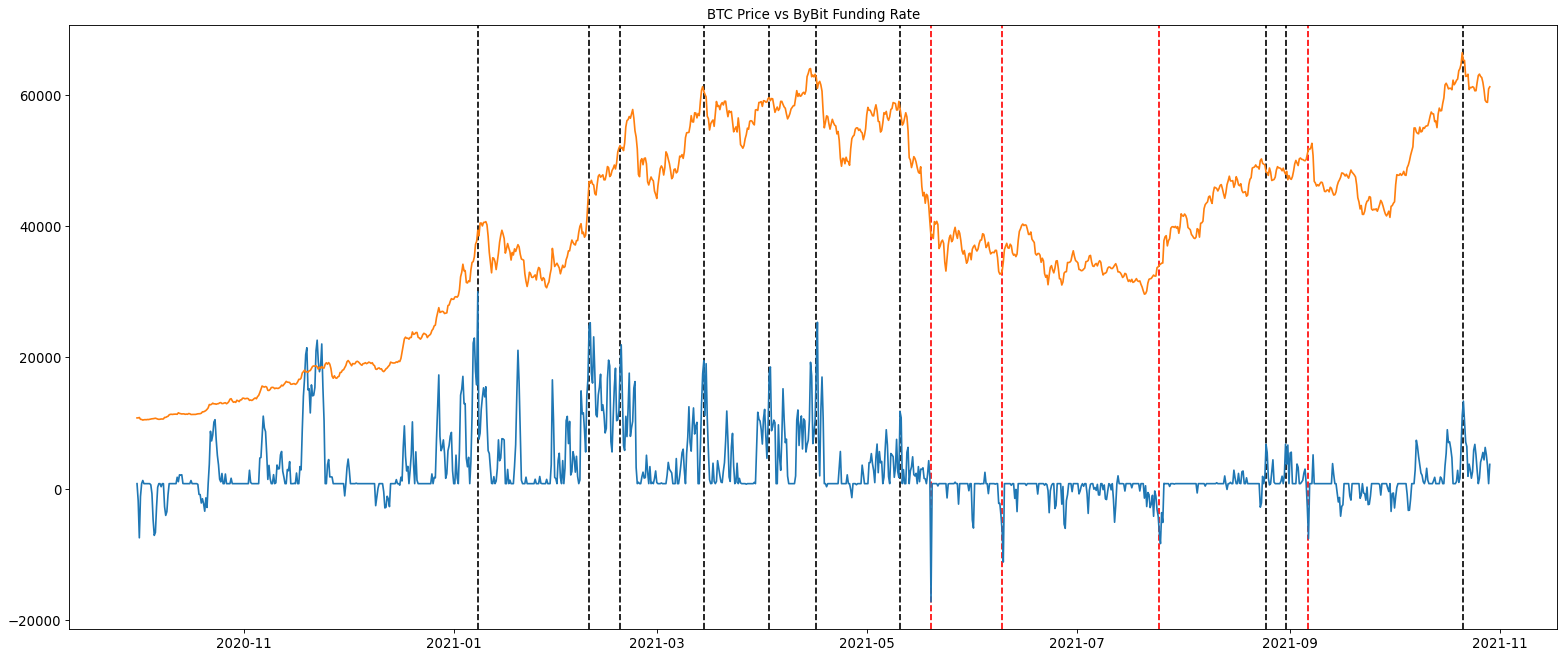

In [ ]:
figure(figsize=(24, 10), dpi=80)
d1 = df['Funding Rate']
d2 = df['open']
d3 = df['high']
d4 = df['low']
d5 = df['OC_avg']
d6 = df['HL_avg']
d7 = df['Volume BTC']
d8 = df['tradecount']
x = df['Time(UTC)']
plt.title("BTC Price vs ByBit Funding Rate")

#plt.vlines(x=[5], ymin=0, ymax=len(t), colors='purple', ls='--', lw=2, label='vline_multiple')
plt.axvline(x=pd.Timestamp(a1), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a2), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a3), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a4), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a5), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a6), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a7), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a8), color='r', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a9), color='r', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a10), color='r', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a11), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a12), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a13), color='r', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a14), color='k', ls='--', label='avline')

plt.plot(x,d1*8000000)
plt.plot(x,d2)

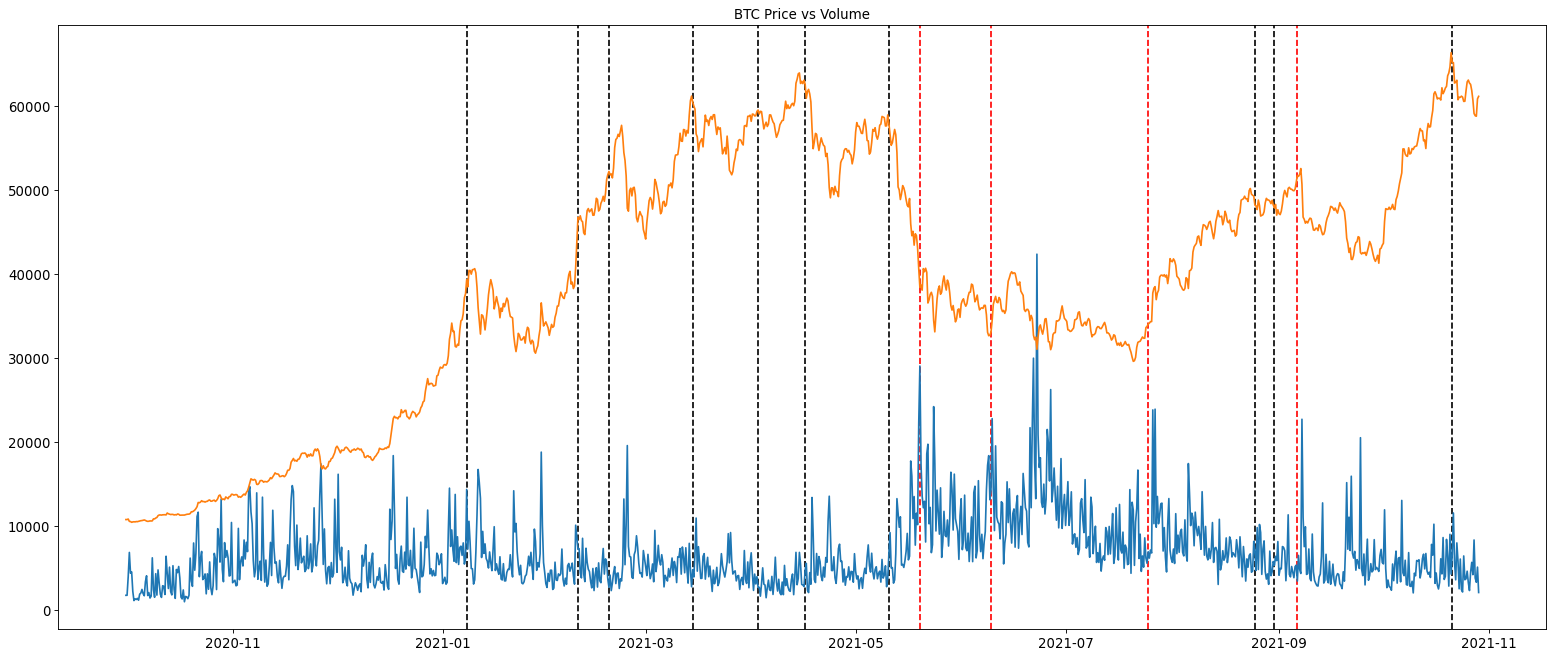

In [ ]:
figure(figsize=(24, 10), dpi=80)

#plt.vlines(x=[5], ymin=0, ymax=len(t), colors='purple', ls='--', lw=2, label='vline_multiple')
plt.axvline(x=pd.Timestamp(a1), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a2), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a3), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a4), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a5), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a6), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a7), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a8), color='r', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a9), color='r', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a10), color='r', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a11), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a12), color='k', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a13), color='r', ls='--', label='avline')
plt.axvline(x=pd.Timestamp(a14), color='k', ls='--', label='avline')

plt.title("BTC Price vs Volume")
plt.plot(x,d7/2.5)
plt.plot(x,d2)